# Sonnet Generation

In this Jupyter notebook, we visualize how HMMs work and generate Shakespeare sonnets


In [17]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    parse_backwards_observations,
    generate_rhyme_seq,
    make_rhyme,
    sample_sonnet,
    sample_backwards_sonnet,
    parse_syllables
)

## Visualization of the dataset

We will be using Shakespeare's sonnets as our dataset. First, we visualize the entirety of Shakespeare as a wordcloud:

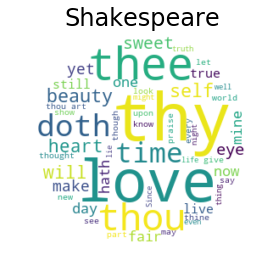

In [2]:
text = open(os.path.join(os.getcwd(), 'data_shakespeare/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

# We create a dictionary of [key=word, value = # syllables] 

In [3]:

syllable_text = open(os.path.join(os.getcwd(), 'data_shakespeare/Syllable_dictionary.txt')).read()

syllable_map = parse_syllables(syllable_text)



# Training an HMM forwards


Now we train a forward HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [4]:
obs_forwards, obs_map_forwards = parse_observations(text)

hmm8_forwards = unsupervised_HMM(obs_forwards, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [5]:
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm8_forwards, obs_map_forwards, syllable_map, 10, 14))

Sample Sonnet:
Like women's thoughts and bristly i hand when:
An thing even dead a orient or tell?
Purge i so which i use thee born quest that:
Present'st the glory thy i is dove chaste,
Shames sometime steal own own or bright plague thou?
Write the praise will i against the every?
Deeds and my sun acquaintance possession:
I thou you if dost thou be see sin show:
Race a twilight and to fever it as:
A self so of sweet despite invention,
Lest audit must for my riper addeth?
In that have rose my vulgar yet his all,
Death's name to thou give the were hap at dear,
Part thy so love bear time so world being.



# Training an HMM backwards with rhyme 

In [6]:
obs_backwards, obs_map_backwards = parse_backwards_observations(text)
rhyme_set = make_rhyme(text)
hmm8_backwards = unsupervised_HMM(obs_backwards, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [16]:
print('Sample Sonnet:\n====================')
rhymes = generate_rhyme_seq(rhyme_set)
print(sample_backwards_sonnet(hmm8_backwards, obs_map_backwards, syllable_map, 10, 14, rhymes))

Sample Sonnet:
That flesh th' weak estimate disabled.
Humour and corrupting others may gems,
This and his rocks beds' guest lend strumpeted,
Sweetest love fair muse the ear limping hems,
And blenches ten let the sorrow thou was.
Hold my heavily tell longer is find,
Wits choose there not live breast and making pass:
Departest thief from masked why dwell thy wind,
That are gluttoning not bends thus comment,
One time the winged you whose what was earth?
Time no days now to clouds will but moment.
Creation even 'thus the eyelids th' dearth?
Know but than ears nay all altered their wit.
Had to which that affable even writ.



##  Visualizing the wordcloud of the forward HMM's states

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

drawing wordclouds


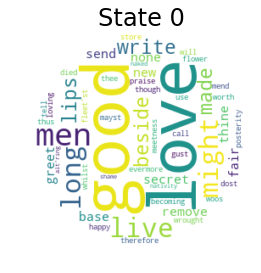

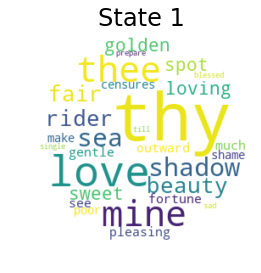

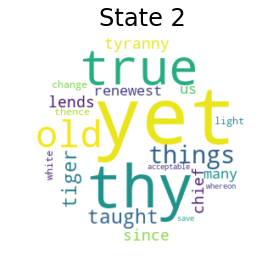

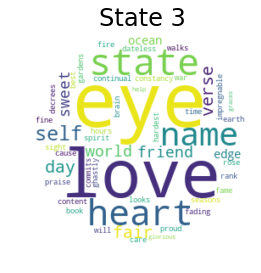

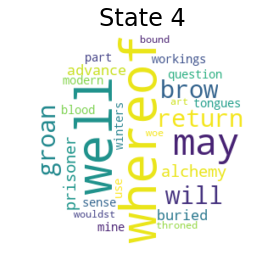

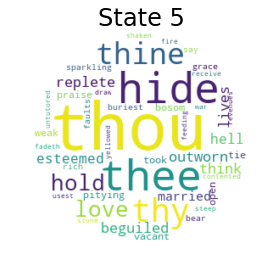

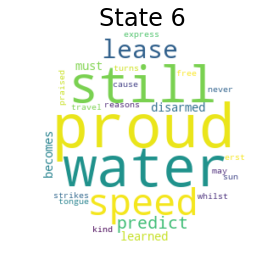

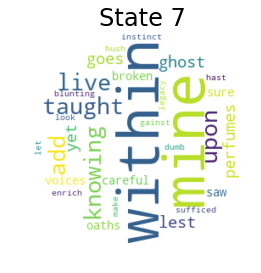

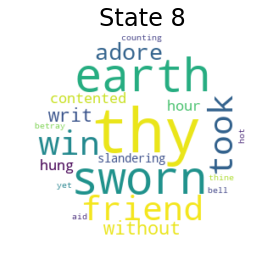

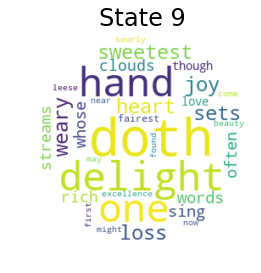

In [8]:
print("drawing wordclouds")
wordclouds = states_to_wordclouds(hmm8_forwards, obs_map_forwards, syllable_map, 10, 100,show=True)